### Maximum Likelihood Estimate (MLE)

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible, and as such the method has become a dominant means of statistical inference.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.optimize import newton

Using uc_index file which contains the record of 25 years.

In [2]:
uv_index = pd.read_csv("uvindex.csv",index_col=0)
uv_index

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1901,4.84,5.08,3.77,7.21,7.01,0.67,2.52,5.53,1.80,4.38,2.57,3.63
1902,3.65,8.85,3.09,2.43,2.23,3.68,5.85,2.17,2.31,1.23,1.52,2.94
1903,3.00,1.18,5.49,1.95,1.75,5.11,7.54,5.79,1.28,2.27,1.74,4.22
1904,1.92,3.85,6.85,3.95,3.75,0.77,7.73,1.84,1.28,1.68,5.31,1.92
1905,1.92,4.04,8.89,1.12,0.92,2.53,8.93,0.71,2.22,1.62,2.43,5.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,7.18,8.67,2.70,10.63,10.43,0.99,3.27,7.80,3.76,2.50,3.77,3.32
2012,3.49,5.97,5.21,6.80,6.60,3.00,3.59,3.65,4.12,5.60,4.81,6.06
2010,2.80,4.04,4.30,0.93,0.73,3.82,2.79,0.54,6.77,0.72,2.89,2.59


The derivative of a function of a single variable at a chosen input value, when it exists, is the slope of the tangent line to the graph of the function at that point. The tangent line is the best linear approximation of the function near that input value.

Text(1.4706070287539936, -0.2, '$x_{n+1}$')

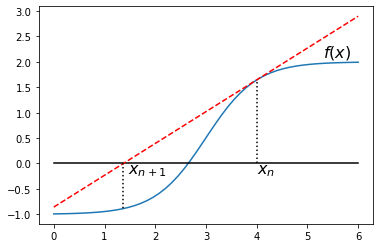

In [3]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)

# zero line
plt.plot([0,6], [0,0], 'k-')

# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)

# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')

# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

To apply the Newton-Raphson algorithm, we need a function that returns a vector containing the **first and second derivatives** of the function with respect to the variable of interest (the second equation above, setting the derivative with respect to $\alpha$ to zero). 

`psi` and `polygamma` are complex functions of the Gamma function that result when you take first and second derivatives of that function. Specifically, 

[scipy.special.psi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.psi.html) = $\frac{\partial log(\Gamma(\alpha))}{\partial\alpha}$ and 

[scipy.special.polygamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.polygamma.html) = $\frac{\partial^2 log(\Gamma(\alpha))}{\partial\alpha^2}$

and the derivative of the second equation above is:

$$\frac{\partial^2 log(l)(\alpha,\beta)}{\partial \alpha^2} = \frac{1}{\alpha} - \frac{\partial^2 log(\Gamma(\alpha))}{\partial\alpha^2}$$

In [4]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [5]:
# Calculate statistics
log_mean = uv_index.mean().apply(np.log)
mean_log = uv_index.apply(np.log).mean()

In [6]:
# Alpha MLE for Jan
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[0], mean_log[0]))
alpha_mle

2.7967466810657746

In [7]:
beta_mle = alpha_mle/uv_index.mean()[0]
beta_mle

0.7136932615612206

In [8]:
uv_index_mean = uv_index.mean()
uv_index_mean

Jan    3.918696
Feb    4.051652
Mar    5.312435
Apr    4.175478
May    3.976000
Jun    3.745478
Jul    4.244174
Aug    2.471913
Sep    3.195304
Oct    3.277391
Nov    3.207739
Dec    4.306696
dtype: float64

In [9]:
uv_index_std = uv_index.std()
uv_index_std

Jan    2.369142
Feb    2.094699
Mar    2.331898
Apr    2.105032
May    2.105642
Jun    2.451850
Jul    1.821925
Aug    2.081607
Sep    1.977573
Oct    1.622018
Nov    1.943346
Dec    2.231765
dtype: float64

In [10]:
uv_index_var = uv_index.var()
uv_index_var

Jan    5.612832
Feb    4.387763
Mar    5.437750
Apr    4.431160
May    4.433728
Jun    6.011571
Jul    3.319412
Aug    4.333088
Sep    3.910795
Oct    2.630944
Nov    3.776593
Dec    4.980773
dtype: float64

In [11]:
alpha_mom = uv_index_mean ** 2 / uv_index_var
beta_mom = uv_index_var / uv_index_mean
alpha_mom, beta_mom

(Jan    2.735905
 Feb    3.741288
 Mar    5.190007
 Apr    3.934550
 May    3.565527
 Jun    2.333601
 Jul    5.426567
 Aug    1.410162
 Sep    2.610714
 Oct    4.082677
 Nov    2.724569
 Dec    3.723845
 dtype: float64,
 Jan    1.432322
 Feb    1.082956
 Mar    1.023589
 Apr    1.061234
 May    1.115123
 Jun    1.605021
 Jul    0.782110
 Aug    1.752929
 Sep    1.223920
 Oct    0.802756
 Nov    1.177338
 Dec    1.156519
 dtype: float64)

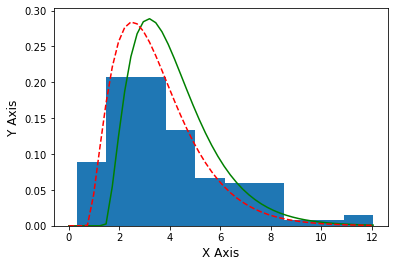

In [12]:
from scipy.stats.distributions import gamma

Jan = uv_index.Jan
Jan.hist(density=True, bins=10, grid=False)
x = np.linspace(0, Jan.max())
plt.ylabel('Y Axis', fontsize=12)
plt.xlabel('X Axis', fontsize=12)
plt.plot(x, gamma.pdf(x, alpha_mom[0], beta_mom[0]), 'g-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

In [13]:
from scipy.stats import gamma

gamma.fit(uv_index.Jan)

(2.744562522029737, 0.026409529797744132, 1.4181790255823477)

### Using pymc3 metod

Added mean as 6 and standard deviation is 3
Rest of the things are copied from prof. notebook.

In [14]:
from pymc3 import Model, Uniform, Normal, StudentT

with Model() as drug_model:
    μ_0 = Normal('μ_0', 6, sd=3)
    μ_1 = Normal('μ_1', 6, sd=3)

In [15]:
with drug_model:
    σ_0 = Uniform('σ_0', lower=0, upper=5)
    σ_1 = Uniform('σ_1', lower=0, upper=5)

/Users/sushrutmujumdar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


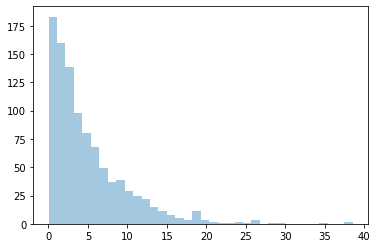

In [16]:
from pymc3 import Exponential
sns.distplot(Exponential.dist(1/5).random(size=1000), kde=False);

In [17]:
with drug_model:
    ν = Exponential('ν_minus_one', 1/5.) + 1

In [18]:
with drug_model:
    drug_like = StudentT('drug_like', nu=ν, mu=μ_1, lam=σ_1**-2, observed=uv_index.Jan)
    placebo_like = StudentT('placebo_like', nu=ν, mu=μ_0, lam=σ_0**-2, observed=uv_index.Dec)

In [19]:
from pymc3 import Deterministic
    
with drug_model:
    diff_of_means = Deterministic('difference of means', μ_1 - μ_0)
    effect_size = Deterministic('effect size', diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))

Random Seed size is given as 25000 due to laptop capacity. 
It taking long time if more seeds added.

In [20]:
from pymc3 import fit
RANDOM_SEED = 25000
with drug_model: 
    drug_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 526.8


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/sushrutmujumdar/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


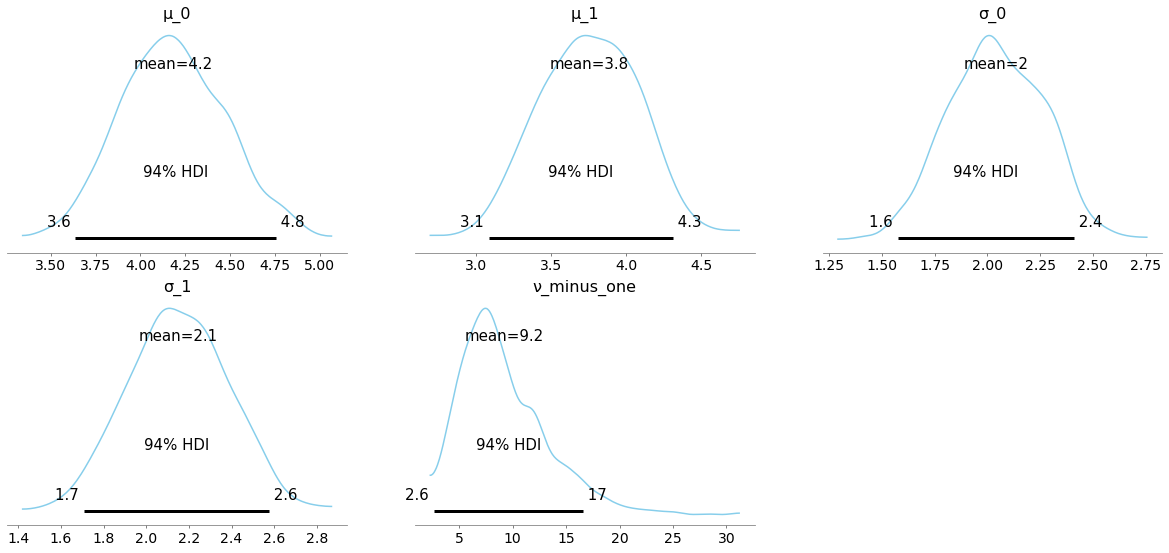

In [21]:
from pymc3 import plot_posterior

plot_posterior(drug_trace[100:], 
                var_names=['μ_0', 'μ_1', 'σ_0', 'σ_1', 'ν_minus_one'],
                color='#87ceeb');

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/sushrutmujumdar/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


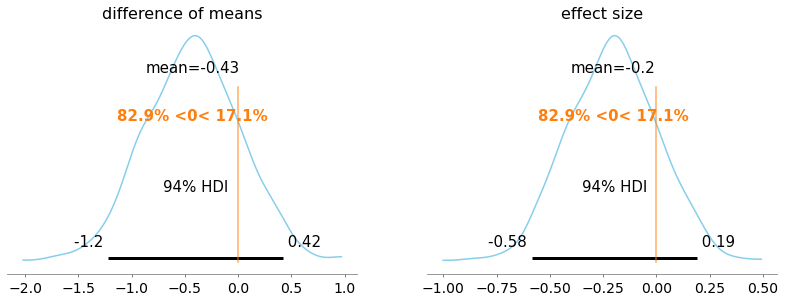

In [22]:
plot_posterior(drug_trace[100:], 
          var_names=['difference of means', 'effect size'],
          ref_val=0,
          color='#87ceeb');

### MOM VS MLE easiness

MOM is easy to implement as compared to MLE.
The implementation of MLE with scipy is fast and requires less time. 
While implementing using pymc3, its challenging and model creation is complex. 